# CA4 Machine learning

#### import libraries

In [123]:
import pandas as pd
pd.options.mode.chained_assignment = None 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn import preprocessing
from copy import deepcopy
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from math import log2
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#### read from dataset.csv and check the structure of dataframe (info)

In [124]:
data = pd.read_csv('dataset.csv')
filmData = pd.DataFrame(data)
print("Film data info(): ")
print(filmData.info())

Film data info(): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB
None


#### Applying Describe Method

In [125]:
print("Film data describe(): ")
for col in filmData:
    print(col)
    print(filmData[col].describe())
    print("****")

Film data describe(): 
type
count     11059
unique        2
top       Movie
freq       6131
Name: type, dtype: object
****
title
count              11059
unique             10957
top       Sister, Sister
freq                   2
Name: title, dtype: object
****
cast
count                   9694
unique                  9307
top       David Attenborough
freq                      20
Name: cast, dtype: object
****
country
count              8364
unique              760
top       United States
freq               3105
Name: country, dtype: object
****
release_year
count    11059.000000
mean      2014.209603
std          8.959517
min       1925.000000
25%       2013.000000
50%       2017.000000
75%       2019.000000
max       2021.000000
Name: release_year, dtype: float64
****
listed_in
count                            11059
unique                             888
top       Dramas, International Movies
freq                               362
Name: listed_in, dtype: object
****
description
count 

#### Computing Percentage of Missing Values

In [126]:
percent_missing = filmData.isnull().sum() * 100 / len(filmData)
print(percent_missing)

type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64


#### filling Nan data with mean and mode

In [127]:
newFilmData = deepcopy(filmData)
numeric_columns = filmData.select_dtypes(include=['number']).columns
newFilmData[numeric_columns] = filmData[numeric_columns].fillna(filmData.mean(numeric_only=True))

Categorical_columns = filmData.select_dtypes(exclude=['number']).columns
newFilmData[Categorical_columns] = filmData[Categorical_columns].transform(lambda a: a.fillna(a.mode()[0]))

##### normalization data

In [128]:
norm = MinMaxScaler().fit(filmData[['release_year']])
x_train_norm = norm.transform(filmData[['release_year']])
x_train_norm

array([[0.98958333],
       [1.        ],
       [1.        ],
       ...,
       [0.92708333],
       [0.94791667],
       [0.86458333]])

##### Standardization data

In [129]:
standard = StandardScaler().fit(filmData[['release_year']])
x_train_standard = standard.transform(filmData[['release_year']])
print(x_train_standard)
print(np.mean(x_train_standard))
print(np.std(x_train_standard))

[[ 0.64631375]
 [ 0.75793196]
 [ 0.75793196]
 ...
 [-0.02339552]
 [ 0.19984091]
 [-0.69310478]]
-1.2014783577822473e-14
1.0


#### encode categorical data with label encoding

In [130]:
newFilmData['type'] = newFilmData[['type']].apply(preprocessing.LabelEncoder().fit_transform)
newFilmData['country'] = newFilmData[['country']].apply(preprocessing.LabelEncoder().fit_transform)

#### divide listed_in in 3 part

In [131]:
listed_in_data = newFilmData['listed_in'].str.split(',')
newFilmData['listed_in2'] = None
newFilmData['listed_in3'] = None
for i in range(len(newFilmData)):
    newFilmData['listed_in'][i] = listed_in_data[i][0]
    if len(listed_in_data[i]) > 1:
        newFilmData['listed_in2'][i] = listed_in_data[i][1]
    if len(listed_in_data[i]) > 2 :
        newFilmData['listed_in3'][i] = listed_in_data[i][2]
print(newFilmData)    

       type                  title  \
0         0   Dick Johnson Is Dead   
1         1          Blood & Water   
2         1              Ganglands   
3         1  Jailbirds New Orleans   
4         1           Kota Factory   
...     ...                    ...   
11054     1       X-Men: Evolution   
11055     1              Smart Guy   
11056     1   Disney Kirby Buckets   
11057     1         Disney Mech-X4   
11058     1     Imagination Movers   

                                                    cast  country  \
0                                     David Attenborough      608   
1      Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...      430   
2      Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...      608   
3                                     David Attenborough      608   
4      Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...      254   
...                                                  ...      ...   
11054  Noel Fisher, Vincent Gale, Christopher Judge, ...    

#### encode listed_in

In [132]:
newFilmData['listed_in'] = newFilmData[['listed_in']].apply(preprocessing.LabelEncoder().fit_transform)
newFilmData['listed_in2'] = newFilmData[['listed_in2']].apply(preprocessing.LabelEncoder().fit_transform)
newFilmData['listed_in3'] = newFilmData[['listed_in3']].apply(preprocessing.LabelEncoder().fit_transform)

#### Extract features from description and title

In [133]:
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(1, 2), min_df = 10)  
x = newFilmData['description'] + newFilmData['title']
count_vectorized  = vectorizer.fit_transform(x)
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
vectorized = tfidf_transformer.fit_transform(count_vectorized)
pd.DataFrame(vectorized.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(x))],
             columns=vectorizer.get_feature_names_out())

featureNames = vectorizer.get_feature_names_out()
feature = []
for col in vectorized.toarray():
       for i in range((len(col))):
              if col[i] > 0.7:
                     if featureNames[i] not in feature:
                            feature.append(featureNames[i])
print(feature)
print(len(feature))

['chicago', 'sugar', 'christmas', 'anger', 'freedom', 'hitler', 'rock', 'trucks', 'physics', 'season', 'sheep', 'short', 'rainbow', 'restaurant', 'monkey', 'joe', 'del', 'knock', 'global', 'bear', 'las', 'machine', 'names', 'cats', 'test', 'before', 'amazon', 'gear', 'act', 'series', 'fishing', 'impact', 'chicken', 'junior', 'agent', 'zoo', 'adventures', 'dinosaurs', 'luna', 'marvel', 'animal', 'hawaii', 'toys', 'fish', 'mickey', 'rocket', 'moments', 'cartoon', 'spider']
49


delete description and title and add new features

In [134]:
featureIndex = [] 
for i in range(len(featureNames)):
    if featureNames[i] in feature:
        featureIndex.append(i)

for i in range(len(featureIndex)):
    newFilmData[featureNames[featureIndex[i]]] = vectorized.toarray()[:, featureIndex[i]]

del newFilmData["description"]
del newFilmData["title"]
newFilmData

,type,cast,country,release_year,listed_in,listed_in2,listed_in3,act,adventures,agent,...,season,series,sheep,short,spider,sugar,test,toys,trucks,zoo
0,0,David Attenborough,608,2020,22,75,77,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",430,2021,37,63,65,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",608,2021,20,33,61,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,David Attenborough,608,2021,24,46,77,0.0,0.0,0.0,...,0.0,0.102445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",254,2021,37,49,62,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,"Noel Fisher, Vincent Gale, Christopher Judge, ...",608,2000,2,2,28,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11055,1,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",608,1996,18,13,28,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11056,1,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",608,2014,2,12,8,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11057,1,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",59,2016,2,12,50,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Extract features from actors

then delete actor and add 10 new actor name

In [135]:
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(2, 2), min_df = 10 , max_features = 10 )
vectorized = vectorizer.fit_transform(newFilmData['cast'])
actors = pd.DataFrame(vectorized.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(newFilmData['cast']))],
             columns=vectorizer.get_feature_names_out ())

actNames = vectorizer.get_feature_names_out()
newFilmData = newFilmData.join(actors.reset_index(drop = True))
del newFilmData["cast"]
actNames

array(['anupam kher', 'david attenborough', 'juan pablo', 'julie tejwani',
       'naseeruddin shah', 'rukh khan', 'rupa bhimani', 'shah rukh',
       'takahiro sakurai', 'yuki kaji'], dtype=object)

In [136]:
newFilmData

,type,country,release_year,listed_in,listed_in2,listed_in3,act,adventures,agent,amazon,...,anupam kher,david attenborough,juan pablo,julie tejwani,naseeruddin shah,rukh khan,rupa bhimani,shah rukh,takahiro sakurai,yuki kaji
0,0,608,2020,22,75,77,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,1,430,2021,37,63,65,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,608,2021,20,33,61,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,608,2021,24,46,77,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,1,254,2021,37,49,62,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,608,2000,2,2,28,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11055,1,608,1996,18,13,28,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11056,1,608,2014,2,12,8,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11057,1,59,2016,2,12,50,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


#### calculate Information gain and plot

Text(0.5, 1.0, 'Information gain')

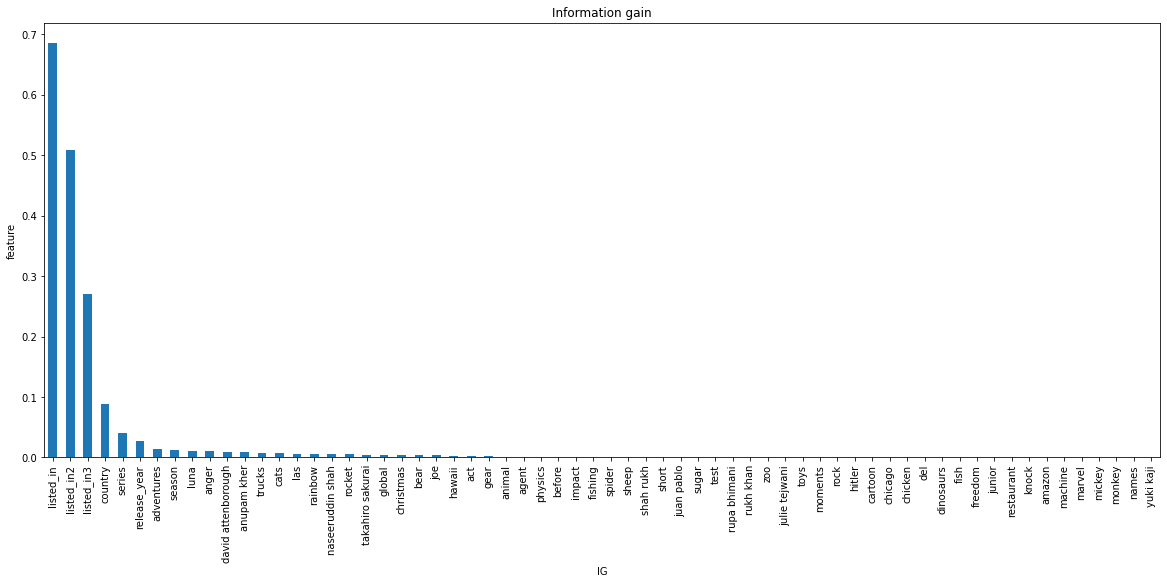

In [137]:
target = newFilmData['type']
newFilmData.drop(columns = 'type', axis = 1, inplace=True)
gainInfo = mutual_info_classif(newFilmData, target)
gainInfo = pd.Series(mutual_info_classif(newFilmData, target))
gainInfo.index = newFilmData.columns
gainInfo.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.ylabel("feature")
plt.xlabel("IG")
plt.title("Information gain")

### Dicision tree

Split data to test and train then run decision tree algorithm. then calculate accuracy_score

In [138]:
def decisiionTree(newFilmData, t, target):
    y = target
    X_train, X_test, y_train, y_test = train_test_split(newFilmData, y, test_size= t, random_state=1)
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_trainPred = clf.predict(X_train)
    print("Accuracy of test is " , accuracy_score(y_test, y_pred), " for test size", t)
    print("Accuracy of train is " , accuracy_score(y_train, y_trainPred))

examine various test size

In [139]:
decisiionTree(newFilmData, 0.01, target)
decisiionTree(newFilmData, 0.7, target)
decisiionTree(newFilmData, 0.3, target)

Accuracy of test is  0.990990990990991  for test size 0.01
Accuracy of train is  1.0
Accuracy of test is  0.9865667786101783  for test size 0.7
Accuracy of train is  1.0
Accuracy of test is  0.9942736588306209  for test size 0.3
Accuracy of train is  1.0


Function for depth changes

In [140]:
def decisiionTreeDepth(newFilmData, depth, target):
    y = target
    X_train, X_test, y_train, y_test = train_test_split(newFilmData, y, test_size= 0.3, random_state=1)
    clf = DecisionTreeClassifier(max_depth = depth).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_trainPred = clf.predict(X_train)
    trainList = accuracy_score(y_test, y_pred)
    testList = accuracy_score(y_train, y_trainPred)
    print("Accuracy of test is " , accuracy_score(y_test, y_pred), "for drpth ", depth)
    print("Accuracy of train is " , accuracy_score(y_train, y_trainPred))
    return trainList, testList

examine various depth

In [141]:
testList = []
trainList = []
for depth in range(1, 15):
    testAcc, trainAcc = decisiionTreeDepth(newFilmData, depth, target)
    testList.append(testAcc)
    trainList.append(trainAcc)

Accuracy of test is  0.7091621458710067 for drpth  1
Accuracy of train is  0.7023640356543083
Accuracy of test is  0.7329716696805304 for drpth  2
Accuracy of train is  0.7493863841880894
Accuracy of test is  0.8004822182037372 for drpth  3
Accuracy of train is  0.8146234336649012
Accuracy of test is  0.8402652200120555 for drpth  4
Accuracy of train is  0.8549283038367136
Accuracy of test is  0.8875828812537673 for drpth  5
Accuracy of train is  0.8927787107608836
Accuracy of test is  0.9222423146473779 for drpth  6
Accuracy of train is  0.9197778064849502
Accuracy of test is  0.9520795660036167 for drpth  7
Accuracy of train is  0.945872626275675
Accuracy of test is  0.9674502712477396 for drpth  8
Accuracy of train is  0.9682211600568402
Accuracy of test is  0.9879445449065702 for drpth  9
Accuracy of train is  0.9882444128665547
Accuracy of test is  0.9942736588306209 for drpth  10
Accuracy of train is  0.9985789949618912
Accuracy of test is  0.9933694996986137 for drpth  11
Accura

plot accuracy score based on test data and train data

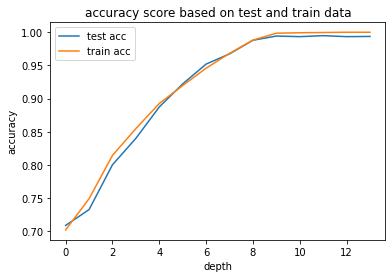

In [142]:
plt.plot(testList, label= 'test acc')
plt.plot(trainList, label= 'train acc')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('accuracy score based on test and train data')
plt.legend()
plt.show()

#### check hyper parameters

In [143]:
def findBestHyper(target):
    X_train, X_test, y_train, y_test = train_test_split(newFilmData, target, test_size= 0.3, random_state=1)
    clf = GridSearchCV(DecisionTreeClassifier(), 
                       {'min_samples_split': np.arange(2, 3, 4),
                       'max_depth': [5, 10, 20, 30, 40, 50]},
                       cv = 4, return_train_score = False, scoring = 'accuracy')
    clf.fit(X_train, y_train)
    pd.DataFrame(clf.cv_results_).head(10)
    accuracy = clf.best_score_
    print(accuracy)
    print(clf.best_params_)

findBestHyper(target)

0.9940581155102824
{'max_depth': 50, 'min_samples_split': 2}


#### confusion matrix

In [144]:
def pltConfusionMatrix(y_test, y_pred , str):
    matrix = confusion_matrix(y_test, y_pred)
    clf = ConfusionMatrixDisplay(matrix, display_labels=['type 0', 'type 1'])
    clf.plot()
    clf.ax_.set(title='Confusion Matrix ' + str, 
                xlabel='Predicted Value', 
                ylabel='Actual Value')
    plt.show()

def decisiionTreeMatrix(newFilmData, depth, tSize, target):
    y = target
    X_train, X_test, y_train, y_test = train_test_split(newFilmData, y, test_size= tSize, random_state=1)
    clf = DecisionTreeClassifier(max_depth = depth).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_trainPred = clf.predict(X_train)
    pltConfusionMatrix(y_test, y_pred, 'test')
    pltConfusionMatrix(y_train, y_trainPred, 'train')
    

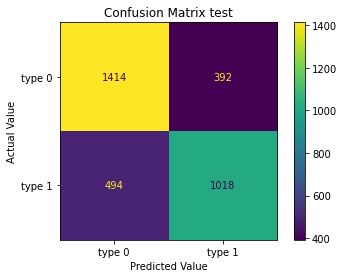

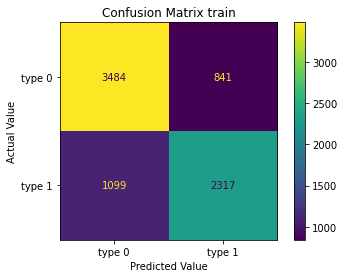

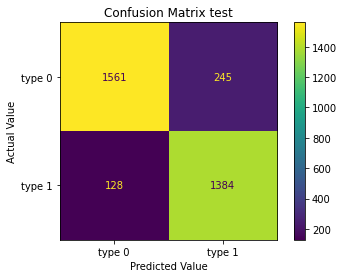

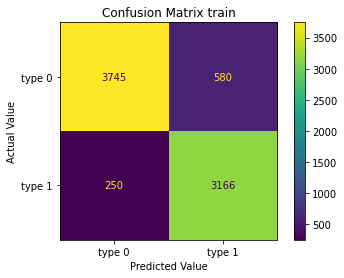

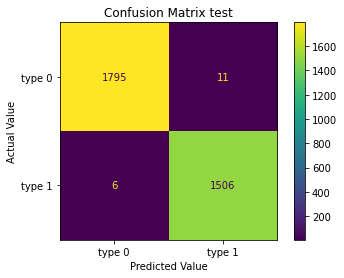

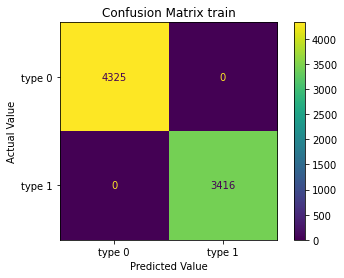

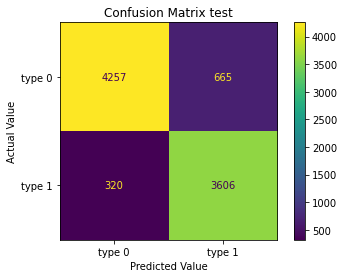

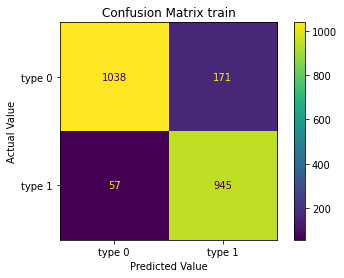

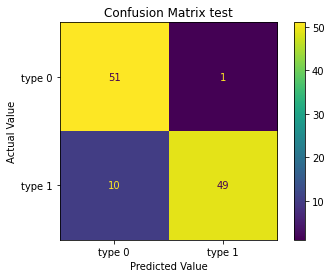

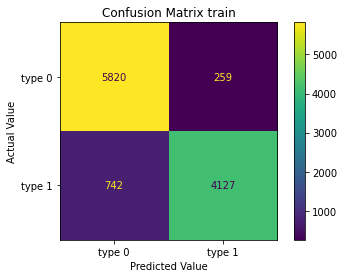

In [145]:
#various depth
decisiionTreeMatrix(newFilmData, 2, 0.3, target)
decisiionTreeMatrix(newFilmData, 5, 0.3, target)
decisiionTreeMatrix(newFilmData, 15, 0.3, target)
#various test size
decisiionTreeMatrix(newFilmData, 5, 0.8, target)
decisiionTreeMatrix(newFilmData, 5, 0.01, target)

### Random forest

In [146]:
def RandomForest(newFilmData, n, m, target):
    X_train, X_test, y_train, y_test = train_test_split(newFilmData, target, test_size=0.3, random_state=42)
    clf = RandomForestClassifier(n_estimators = n, min_samples_leaf = m).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_trainPred = clf.predict(X_train)
    trainList = accuracy_score(y_test, y_pred)
    testList = accuracy_score(y_train, y_trainPred)
    print("Accuracy of test is " , trainList)
    print("Accuracy of train is " , testList)
    return trainList, testList

examine various n_estimators

Accuracy of test is  0.9490657022302592
Accuracy of train is  0.9525901046376437
Accuracy of test is  0.9493670886075949
Accuracy of train is  0.9531068337424106
Accuracy of test is  0.9493670886075949
Accuracy of train is  0.9533651982947939
Accuracy of test is  0.9490657022302592
Accuracy of train is  0.9528484691900271


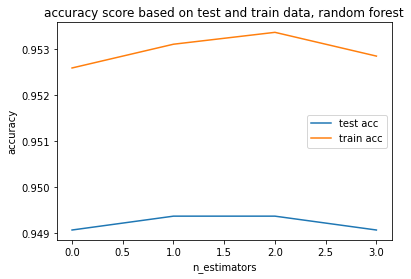

In [147]:
testListForest = []
trainListForest = []
for depth in range(1, 5):
    testAcc, trainAcc = RandomForest(newFilmData, 50*i, 3, target)
    testListForest.append(testAcc)
    trainListForest.append(trainAcc)

plt.plot(testListForest, label='test acc')
plt.plot(trainListForest, label='train acc')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('accuracy score based on test and train data, random forest')
plt.legend()
plt.show()

examine various min_samples_leaf

Accuracy of test is  0.8303194695599759
Accuracy of train is  0.8299961245317142
Accuracy of test is  0.8270042194092827
Accuracy of train is  0.8297377599793309
Accuracy of test is  0.8146473779385172
Accuracy of train is  0.8119106058648753
Accuracy of test is  0.8170584689572031
Accuracy of train is  0.8141067045601343


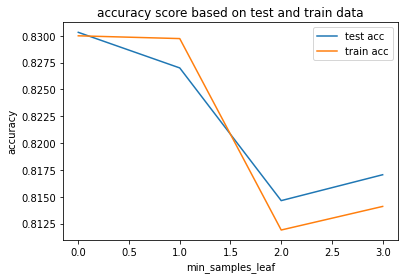

In [148]:
testListForest = []
trainListForest = []
for depth in range(1, 5):
    testAcc, trainAcc = RandomForest(newFilmData, 50, i, target)
    testListForest.append(testAcc)
    trainListForest.append(trainAcc)

plt.plot(testListForest, label='test acc')
plt.plot(trainListForest, label='train acc')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.title('accuracy score based on test and train data')
plt.legend()
plt.show()